In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.interpolate as sinterp

In [60]:
x = np.arange(0, 20, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)
u = Y
v = X
psi = 0.5 * (X**2 - Y**2)

<IPython.core.display.Javascript object>


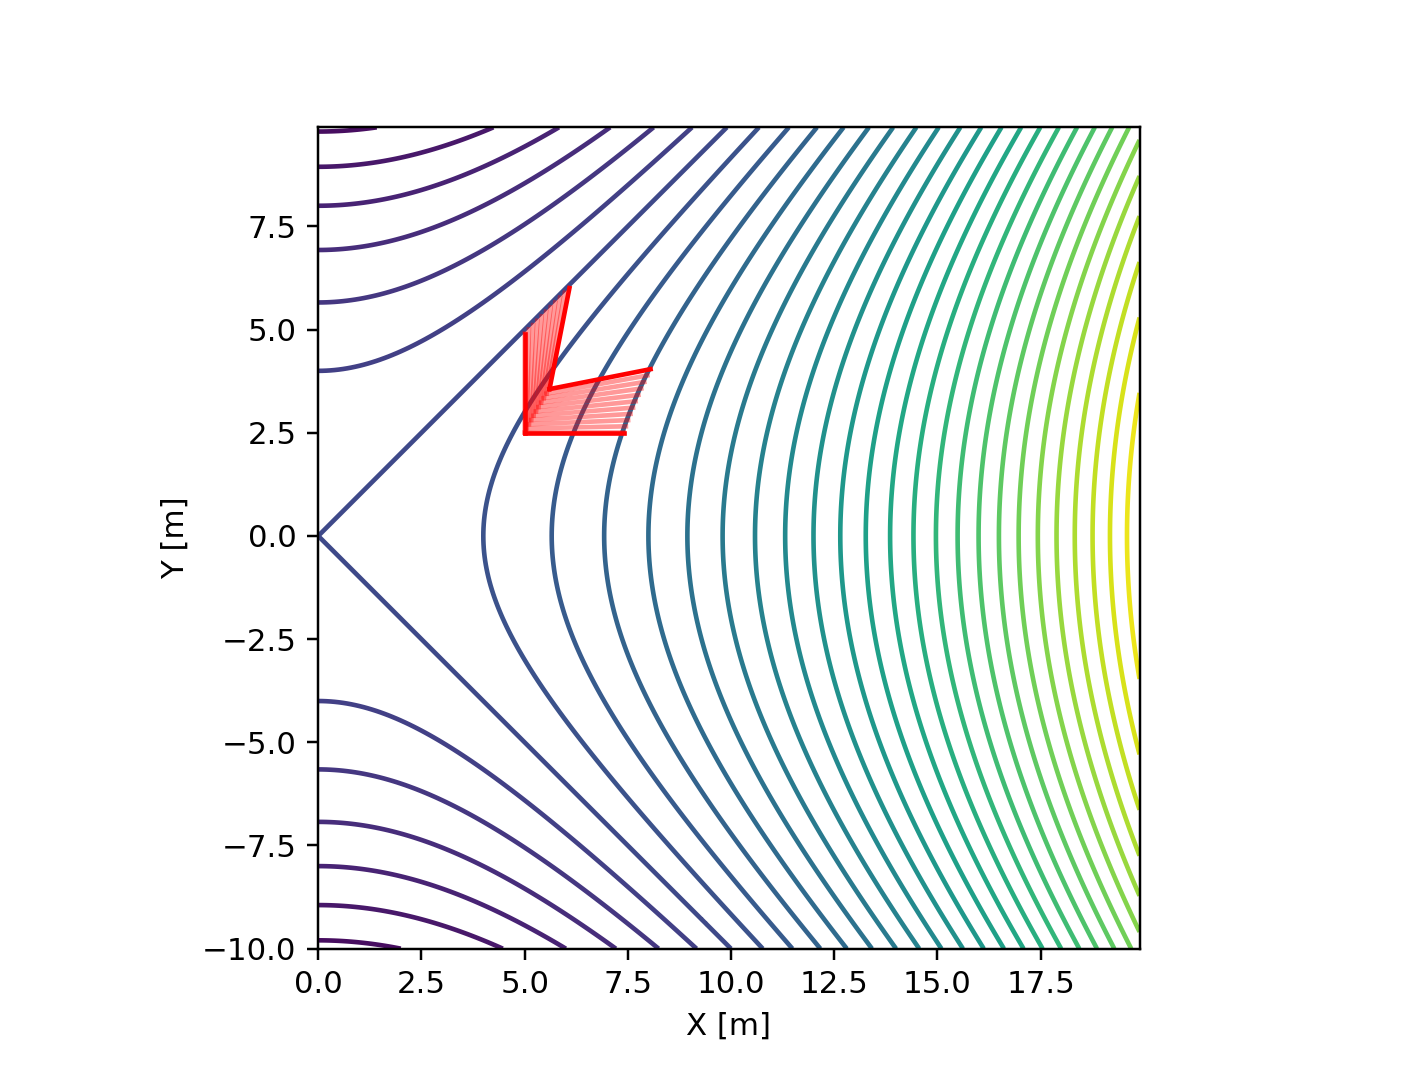

Text(0, 0.5, 'Y [m]')

In [61]:
fig, ax = plt.subplots()
ax.contour(x, y, psi, 40)
ax.set_aspect(1.0)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')


Analytically, flow is non-divergent if $\partial u / \partial x + \partial v / \partial y = 0$ which is trivially true.  

Numerically it is also trivially truem but just to check...

In [62]:
dx = np.diff(x)
dy = np.diff(y)
du = np.diff(u, axis=1)
dv = np.diff(v, axis=0)
print(du[:1, 0] + dv[0, :])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


Placing two material lines:

At this location (x = 5, y = 2.5) we can calculate the shear strait rate as:  

$$\frac{\partial u}{\partial y} + \frac{\partial v}{\partial x} = 2\ \mathrm{rad/s}  $$
Because this is greater than zero, we expect the elements to become closer together at a rate of 2 rad/s...

In [63]:
linex = [[],[]]
liney = [[],[]]

for i in range(2):
    if i == 0:
        line0x = np.arange(5, 7.5, 0.1)
        line0y = 0 * line0x + 2.5
    else:
        line0y = np.arange(2.5, 5, 0.1)
        line0x = 0 * line0y + 5
    
    ax.plot(line0x, line0y, color='r')

    # Now advect forward...
    dt = 0.001 # s...
    for n in range(200):
        fu = sinterp.RectBivariateSpline(x, y, u.T)
        lineU = fu(line0x, line0y, grid=False)
        line0x = line0x + dt * lineU
        fu = sinterp.RectBivariateSpline(x, y, v.T)
        lineV = fu(line0x, line0y, grid=False)
        line0y = line0y + dt * lineV
        if n % 20 == 0:

            ax.plot(line0x, line0y, alpha=0.4, color='r')
    ax.plot(line0x, line0y, color='r')
    linex[i] = line0x
    liney[i] = line0y

    

So the material elements indeed come closer together, so there is a positive shear strain.  We allowed the advection to run for 0.2 s so we would expect the angle between the lines to be reduced by 0.4 radians = 23 degrees.  

We can calculate the angle between the two lines using the dot product...

In [64]:
vec1x = linex[0][-1] - linex[0][0]
vec1y = liney[0][-1] - liney[0][0]
vec2x = linex[1][-1] - linex[1][0]
vec2y = liney[1][-1] - liney[1][0]

dot = vec1x * vec2x + vec1y * vec2y
theta = np.arccos( dot/(abs(vec1x + 1j*vec1y) * abs(vec2x + 1j*vec2y)))
print(np.pi/2 - theta, 'radians')

0.3897410610044514 radians


## Part 2:

Suppose we have a mixing vat, with one inflow at $q_1 = 2\ m^3\,s^{-1}$ and a fluid of density $\rho_1 = 1000\ kg\,m^{-3}$, and a second inflow with density $\rho_2 = 1030\ kg\,m^{-3}$, and an outflow with density $\rho_3 = 1028\ kg\,m^{-3}$.  What must the outflow rate be if the fluids are incompressible?


## Answer:

$$q_1 + q_2 = q_3$$

$$ q_1  \rho_1 + q_2  \rho_2 = q_3  \rho_3$$

Or eliminating the unknown $q_2$:

$$ q_3 = q_1\frac{\rho_2-\rho_1}{\rho_2-\rho_3} $$

So $q_3 = 2 * (30 / 2) = 30\ m^2/s$